# Project Milestone 1 

1) 250-500-word narrative describing your original 
   idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model.

As part of project, I have choosen to analyse and build a model using the Vehicle data.

In the automotive sector, pricing analytics play an essential role for both companies and individuals to assess the market price of a vehicle before putting it on sale or buying it.

there are millions of cars being sold in the market every year, efective price strtegies can help organizations to seel the cars for a competitive price and make profits.

There are two main goals I want to achieve with this Data Science Project. 

First, to estimate the price of used cars by taking into account a set of features like price, odometer and year of the vehicle based on historical data. 

Second, to get a better understanding on the most relevant features that help determine the price of a used vehicle it means, which features are the most relevant ones when estimating the dependent variable “price”.

The data that will be used for this project is accessible at Kaggle and has been scraped from Craigslist, the world’s largest collection of used vehicles for sale.

The Database consists of 426,880 rows and 26 features, one of which will be the continuous dependent variable (“price”) that we want to predict.

The numerical features play a big role in this Regression model, so it is important to understand well how are they distributed in the Database.

As part of this project we will first perfom the EDA, it means, will have to find the outliners and NaaN values/ missing values from the dataset, so that we can better train our model.

Also we need to check for any duplicates,if so, we will have to delete them and keep only one row for each unique record.


2) Do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing. Write a short overview/conclusion of the insights gained from your graphical analysis.

In [88]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set(); 

In [89]:
# Read movie data tsv file 
vehicle_data=pd.read_csv('vehicles.csv')

In [90]:
vehicle_data.shape

(426880, 26)

In [91]:
vehicle_data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# correlation between the features.

<AxesSubplot:>

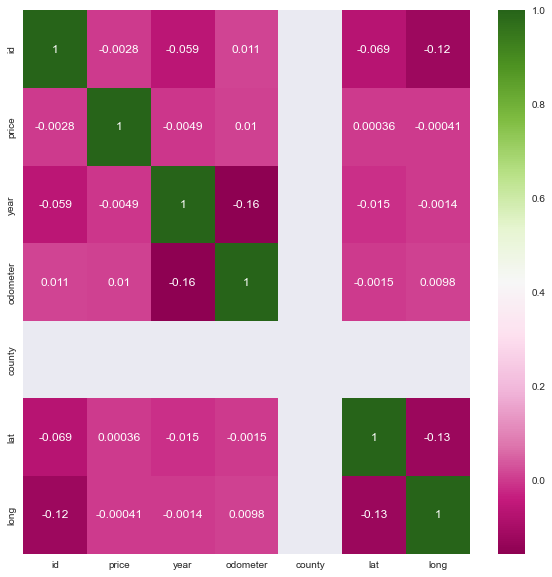

In [92]:

#Heatmaps are the maps that are one of the best ways to find the correlation between the features.
#When the heatmaps is plotted we can see a strong dependency between the Price and odometer.
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
c= vehicle_data.corr()
sns.heatmap(c,cmap='PiYG',annot=True)

# Outliers in Price and odometer

C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

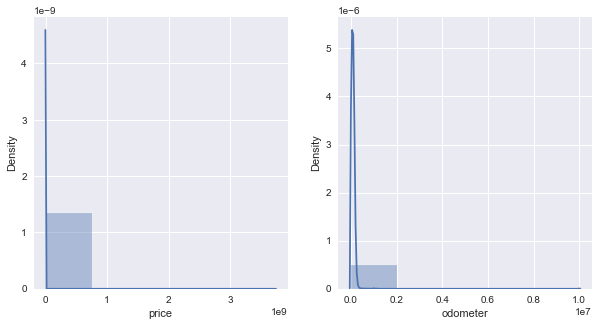

In [93]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(vehicle_data['price'],bins=5)
plt.subplot(122)
sns.distplot(vehicle_data['odometer'],bins=5)

# Scatter Plot for price outliers

In [94]:
# First will drop 10% of each side on Price

rr=sorted(vehicle_data['price'])
quantile1,quantile2=np.percentile(rr,[10,90])
print(quantile1,quantile2)

500.0 37590.0


In [95]:
vehicle_data=vehicle_data[(vehicle_data.price<=37590) & (vehicle_data.price>=500)]

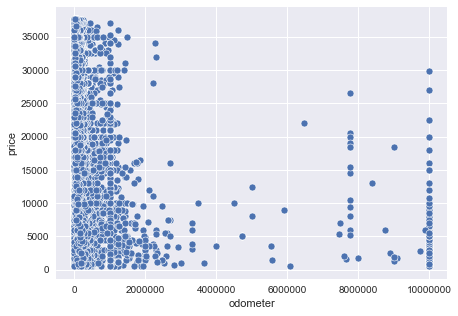

In [96]:
plt.figure(figsize=[7,5])
ax=sns.scatterplot(x=vehicle_data['odometer'],y=vehicle_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [97]:
number_of_vehicles=vehicle_data.groupby(by=["year"], dropna=True).count()

In [98]:
number_of_vehicles

,id,url,region,region_url,price,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
year,,,,,,,,,,,,,,,,,,,,,
1900.0,3,3,3,3,3,1,3,2,0,3,...,0,2,1,3,3,0,3,3,3,3
1901.0,2,2,2,2,2,0,2,1,1,2,...,1,1,1,2,2,0,2,2,2,2
1905.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1909.0,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1910.0,2,2,2,2,2,0,2,2,2,2,...,0,2,2,2,2,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.0,24569,24569,24569,24569,24569,24252,24534,16218,11236,24392,...,4300,21698,18052,24569,24569,0,24569,24415,24415,24569
2019.0,14884,14884,14884,14884,14884,14672,14870,9924,6830,14757,...,2308,13021,11168,14884,14884,0,14884,14785,14785,14884
2020.0,9583,9583,9583,9583,9583,9389,9571,7412,2968,9501,...,767,8566,7368,9583,9583,0,9583,9573,9573,9583


# Number of vehicles by Year for Sale

<AxesSubplot:xlabel='year'>

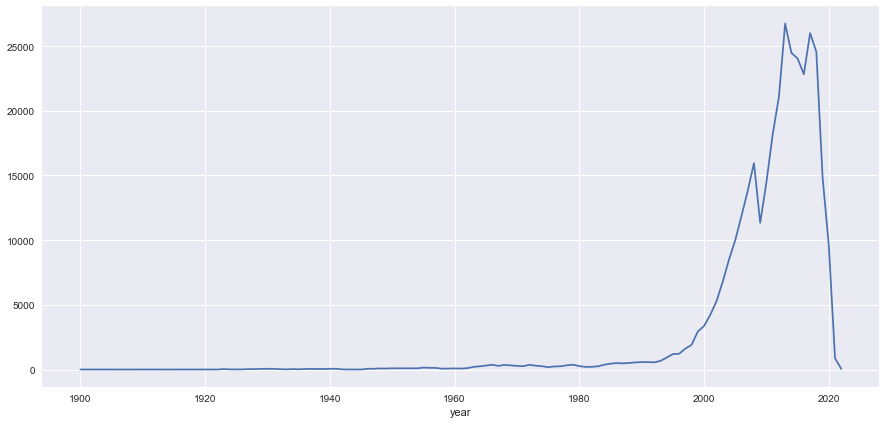

In [99]:
fig, ax = plt.subplots(figsize=(15,7))
vehicle_data.groupby(['year']).count()['id'].plot(ax=ax)

# Conclusion

Based on the Above data and graphs, I understand that there are lot of outliners in the price features,also have NaaN,null and missing values in other features, in order to train the model,
but most of the features have hightest missing values, we should first clean up the data and filter the data to get the insights. 
Description column has the useful information for our model, we should write regular expression on description column to filter the useful info like car make etc.

I am planning to use Random Forest Regression model to get the “price” predictions.

# Project Milestone 2

# 1) Drop any features that are not useful for your model building and explain why they are not useful.

we will drop few columns which are not useful for our price prediction. since we are not predicting the price based on the langitude, latitude, VIN number, URL, id and image columns, so these column are redundant for our model, lets drop them to improve the performace.

In [151]:
# Read movie data tsv file 
df_vehicle_data=pd.read_csv('vehicles.csv')

In [152]:
df_vehicle_data.shape

(426880, 26)

In [153]:
df_vehicle_data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [154]:
df_vehicle_data.drop(['lat','long','region_url','url','VIN','county','id','image_url'],axis=1,inplace=True)

In [155]:
df_vehicle_data.shape

(426880, 18)

# 2) Perform any data extraction/selection steps.

1) select Vehiles where price less than or equal to 20,000

In [156]:
vehicle_less_20000=vehicle_data[(vehicle_data.price<=20000)]

In [157]:
vehicle_less_20000

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426854,7302103092,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,7977,2009.0,toyota,matrix,NaN,NaN,...,NaN,sedan,blue,https://images.craigslist.org/00R0R_9w54F9aZHi...,2009 Toyota Matrix S AWD 4-Speed AT ☎ 406-283-...,NaN,wy,45.7629,-108.5390,2021-04-05T10:12:43-0600
426855,7302100739,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,7477,2012.0,fiat,500,NaN,NaN,...,NaN,hatchback,NaN,https://images.craigslist.org/00u0u_kPte1d9m0P...,2012 Fiat 500 Sport ☎ 406-283-3311 Call or Tex...,NaN,wy,45.7629,-108.5390,2021-04-05T10:09:12-0600
426856,7302099628,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,5477,2003.0,nissan,murano,NaN,NaN,...,NaN,SUV,blue,https://images.craigslist.org/00Q0Q_cRLD5gcocY...,2003 Nissan Murano SE AWD ☎ 406-283-3311 Call ...,NaN,wy,45.7629,-108.5390,2021-04-05T10:07:34-0600
426869,7301592693,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,13990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00v0v_Jjy23qmkm1...,Carvana is the safer way to buy a car During t...,NaN,wy,33.7865,-84.4454,2021-04-04T03:50:17-0600


2) select max/latest year of vehicles where price is less than or equal than 20000

In [158]:
vehicle_less_year_latest=vehicle_less_20000['year'].max()

In [159]:
vehicle_less_year_latest

2022.0

So we have vehicles from year 2022 with less than or euqals to $20000 price

3) Find highest cost brand vehicle

In [160]:
df_vehicle_data['price'].max()

3736928711

In [161]:
df_vehicle_data[df_vehicle_data.price==3736928711]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,automatic,4wd,full-size,pickup,silver,Selling my 2007 Toyota Tundra SR5 four wheel d...,or,2021-04-16T18:16:12-0700
356716,knoxville,3736928711,1999.0,toyota,4runner,fair,6 cylinders,gas,211000.0,clean,automatic,4wd,mid-size,NaN,green,"99 four runner 211,000 miles runs great 4x4 wo...",tn,2021-04-05T23:15:48-0400


We found 2 cars with hightest proce Toyota Tundra SR5 and 99 four runner

# 3) Transform features if necessary.

In [162]:
# Drop duplicates first 
# We will drop the duplicates and keep on of each
df_vehicle_data=df_vehicle_data.drop_duplicates(keep='first')

In [163]:
columns = ['manufacturer']

there are values that have been added inconsistently. For example, we have these kinds of values in the same column: ‘awd’ and ‘ awd ’. To unify the strings, the strip() method will be used.

In [164]:
# Take care of inconsistent data
columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']
for i in columns:
    df_vehicle_data[i]=df_vehicle_data[i].str.strip
    

C:\Users\nbaga\AppData\Local\Temp\ipykernel_24616\454680197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data[i]=df_vehicle_data[i].str.strip


# 4)Engineer new useful features.

It seems description has most details about the car, First, I will be using Regular Expressions on the column “description”. This feature contains the text with the advertisement of each used car.
The goal is to get key information from there in order to fill the NaN values of other columns in the database. The columns we want to fill are those with categorical values that don’t have too many uniques values

In [165]:

import re

manufacturer = '(gmc | hyundai | toyota | mitsubishi | ford | chevrolet | ram | buick | jeep | dodge | subaru | nissan | audi | rover  | lexus \
| honda | chrysler | mini | pontiac | mercedes-benz | cadillac | bmw | kia | volvo | volkswagen | jaguar | acura | saturn | mazda | \
mercury | lincoln | infiniti | ferrari | fiat | tesla | land rover | harley-davidson | datsun | alfa-romeo | morgan | aston-martin | porche \
| hennessey)'
condition = '(excellent | good | fair | like new | salvage | new)'
fuel = '(gas | hybrid | diesel |electric)'
title_status = '(clean | lien | rebuilt | salvage | missing | parts only)'
transmission = '(automatic | manual)'
drive = '(4x4 | awd | fwd | rwd | 4wd)'
size = '(mid-size | full-size | compact | sub-compact)'
type_ = '(sedan | truck | SUV | mini-van | wagon | hatchback | coupe | pickup | convertible | van | bus | offroad)'
paint_color = '(red | grey | blue | white | custom | silver | brown | black | purple | green | orange | yellow)'
cylinders = '(\s[1-9] cylinders? |\s1[0-6]? cylinders?)'

keys =    ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
columns = [ manufacturer,   condition,   fuel,  title_status, transmission ,drive, size, type_, paint_color,   cylinders]

for i,column in zip(keys,columns):
    df_vehicle_data[i] = df_vehicle_data[i].fillna(
      df_vehicle_data['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()

df_vehicle_data.drop('description', axis=1, inplace= True)

C:\Users\nbaga\AppData\Local\Temp\ipykernel_24616\1836883858.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data[i] = df_vehicle_data[i].fillna(
C:\Users\nbaga\AppData\Local\Temp\ipykernel_24616\1836883858.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data.drop('description', axis=1, inplace= True)


# 5) Deal with missing data (do not just drop rows or columns without justifying this).

In [143]:
missing_values_count = pd.DataFrame({'Null':df_vehicle_data.isnull().sum()})
total=len(missing_value_count)
percentage_null=round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by='Null',ascending=False)

,Null,Percentage
type,426860,2510941.2
manufacturer,426860,2510941.2
condition,426860,2510941.2
cylinders,426860,2510941.2
fuel,426860,2510941.2
paint_color,426860,2510941.2
title_status,426860,2510941.2
transmission,426860,2510941.2
drive,426860,2510941.2
size,426860,2510941.2


Will check the odometer , this feture has NaaN Values, will cehck the outliners using the scatter plot

As shown in project milestone -1, since price has a big diference between min and max value will leave 10% of each side

In [144]:
rr=sorted(df_vehicle_data["price"])
quantile1,quantile2=np.percentile(rr,[10,90])
print(quantile1,quantile2)

500.0 37590.0


In [145]:
df_vehicle_data=df_vehicle_data[(df_vehicle_data.price <= 37590) & (df_vehicle_data.price >= 500)]

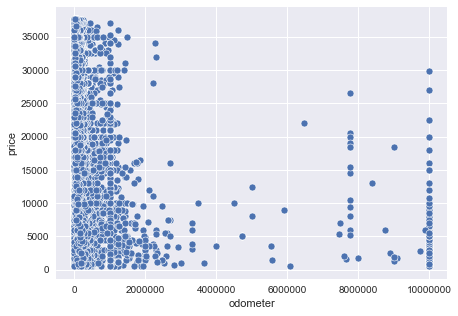

In [146]:
# now check odometer
plt.figure(figsize=[7,5])
ax=sns.scatterplot(x = df_vehicle_data['odometer'],y=df_vehicle_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

Since the outliers start at approximately 3,000,000; I will be dropping the values that exceeds that. Also, it is a good idea to drop the minimum value (0) since it greatly differs from the 25% percentile.

In [147]:
# take only value until 3,00,000
df_vehicle_data=df_vehicle_data[(df_vehicle_data.odometer < 300000)]

In [149]:
df_vehicle_data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
27,auburn,33590,2014.0,NaN,sierra 1500 crew cab slt,NaN,NaN,NaN,57923.0,NaN,NaN,NaN,NaN,NaN,NaN,al,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,NaN,silverado 1500,NaN,NaN,NaN,71229.0,NaN,NaN,NaN,NaN,NaN,NaN,al,2021-05-04T12:31:08-0500
30,auburn,30990,2017.0,NaN,tundra double cab sr,NaN,NaN,NaN,41124.0,NaN,NaN,NaN,NaN,NaN,NaN,al,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,NaN,f-150 xlt,NaN,NaN,NaN,128000.0,NaN,NaN,NaN,NaN,NaN,NaN,al,2021-05-03T14:02:03-0500
32,auburn,27990,2012.0,NaN,sierra 2500 hd extended cab,NaN,NaN,NaN,68696.0,NaN,NaN,NaN,NaN,NaN,NaN,al,2021-05-03T13:41:25-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,NaN,maxima s sedan 4d,NaN,NaN,NaN,32226.0,NaN,NaN,NaN,NaN,NaN,NaN,wy,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,NaN,s60 t5 momentum sedan 4d,NaN,NaN,NaN,12029.0,NaN,NaN,NaN,NaN,NaN,NaN,wy,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,NaN,xt4 sport suv 4d,NaN,NaN,NaN,4174.0,NaN,NaN,NaN,NaN,NaN,NaN,wy,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,NaN,es 350 sedan 4d,NaN,NaN,NaN,30112.0,NaN,NaN,NaN,NaN,NaN,NaN,wy,2021-04-04T03:21:11-0600


# 6) Create dummy variables if necessary.

In [ ]:
Dummy variables are not necessary for this model